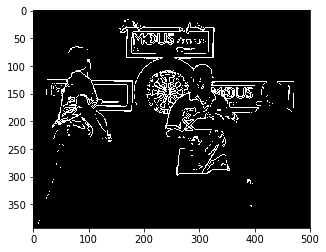

In [3]:
import matplotlib.pyplot as plt
import numpy as np
import cv2
import math

i=6

location = str("../images/dart") + str(i) + str(".jpg")
imgcol = cv2.imread(location)
img = np.array(cv2.cvtColor(imgcol, cv2.COLOR_BGR2GRAY))

sobelx = cv2.Sobel(img,cv2.CV_64F,1,0,ksize=3)
sobely = cv2.Sobel(img,cv2.CV_64F,0,1,ksize=3)

(M,N) = sobelx.shape
grad = np.zeros((M,N))
direc = np.zeros((M,N))
thresh = 5*np.sum(img)/(N*M)

for m in range (0,M): #m = x
    for n in range  (0,N): # n = y
        grad[m,n] = math.sqrt(sobelx[m,n]**2 + sobely[m,n]**2)
        if sobelx[m,n] == 0: # to prevent division by zero in direc
            sobelx[m,n]= 1*10**(-5)
        direc[m,n] = np.arctan(sobely[m,n]/sobelx[m,n])
        if grad[m,n]>thresh:
            grad[m,n] = 255
        else:
            grad[m,n] = 0

saveloc1 = (str("edgedetected/dartgrad" + str(i) + str(".jpg")))
cv2.imwrite(saveloc1,grad)
plt.imshow(grad, cmap='gray')

In [4]:
nc = 4 #numcir 

#assuming the full board has to be in the image and the board isn't distorted. 
maxrad = max(M,N)/2

rad = np.zeros(nc)
for a in range (0,nc):
    rad[a] = (a+1)*maxrad/nc

Hxyr = np.zeros ((M,N,nc))

#eventhough we start in the top right corner, flipping and rotating the space doesnt affect the result
#if we use many values of theta and if there is a edge at that grad(x0,y0) then H(x0,y0,r) + 1??? 
for m in range (0,M): #y
    for n in range (0,N): #x
        for r in rad:
            y0 = np.round(m + r*math.sin(direc[m,n]))
            x0 = np.round(n + r*math.cos(direc[m,n]))
            if y0<M and x0<N:
                Hxyr[y0,x0]
            print (x0)
    
# for m in range (0,M):
#     for n in range (0,N):
#         if not grad[m,n]==0:
#             for t in theta:
                
            
            

IndexError: only integers, slices (`:`), ellipsis (`...`), numpy.newaxis (`None`) and integer or boolean arrays are valid indices

In [ ]:

# #for lines
# theta = np.zeros(nl)
# for a in range (0,nl):
#     theta[a] = a*2*math.pi/nl
